In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np


import hvplot.pandas
import geoviews as gv

In [2]:
crime_data = pd.read_csv(Path('crime_data.csv'))

/var/folders/j4/7sc4jfqx7_l9y_4px8d0cn1w0000gn/T/ipykernel_31002/290000478.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pd.read_csv(Path('crime_data.csv'))


In [3]:
crime_data.keys()


Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD', 'PD_DESC',
       'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'JURIS_DESC', 'BORO_NM',
       'ADDR_PCT_CD', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'PARKS_NM',
       'HADEVELOPT', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude',
       'Lat_Lon'],
      dtype='object')

In [11]:
crime_data=crime_data.dropna()

In [12]:
crime_data=crime_data.rename(columns={'CMPLNT_NUM':"Complaint ID",
                                       'CMPLNT_FR_DT': "Crime Date",
                                       'CMPLNT_FR_TM':"Complaint Time",
                                         'CMPLNT_TO_DT':"Ending Date",
                                        'CMPLNT_TO_TM':"Ending Time", 
                                        'RPT_DT':"Reported Date",
                                        'KY_CD':"Offense Code",
                                        'OFNS_DESC':"Offense Description",
                                        'PD_CD':"Classification Code",
                                        'PD_DESC':"Classification Description",
                                        'CRM_ATPT_CPTD_CD':"Crime Status",
                                        'LAW_CAT_CD':"Offense Level", 
                                        'JURIS_DESC':"Jurisdiction",
                                        'BORO_NM':"Borough",
                                        'ADDR_PCT_CD':"Precinct",
                                        'LOC_OF_OCCUR_DESC':"Location Description", 
                                        'PREM_TYP_DESC':"Premise Description",
                                        'PARKS_NM':"Park Name",
                                        'HADEVELOPT':"Name of NYCHA Housing", 
                                        'X_COORD_CD':"X Coordinate", 
                                        'Y_COORD_CD':"Y Coordinate",
                                        'Latitude':"Latitude",
                                         'Longitude':"Longitude",
                                        })
      

In [13]:
crime_data["Crime Date"] = pd.to_datetime(crime_data["Crime Date"], errors='coerce')
crime_data["Ending Date"] = pd.to_datetime(crime_data["Ending Date"], errors='coerce')
crime_data["Complaint Time"] = pd.to_datetime(crime_data["Complaint Time"], errors='coerce')
crime_data["Ending Time"] = pd.to_datetime(crime_data["Ending Time"], errors='coerce')
crime_data["Reported Date"] = pd.to_datetime(crime_data["Reported Date"], errors='coerce')

In [14]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 12104 to 717414
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Complaint ID                115 non-null    int64         
 1   Crime Date                  115 non-null    datetime64[ns]
 2   Complaint Time              115 non-null    datetime64[ns]
 3   Ending Date                 115 non-null    datetime64[ns]
 4   Ending Time                 115 non-null    datetime64[ns]
 5   Reported Date               115 non-null    datetime64[ns]
 6   Offense Code                115 non-null    int64         
 7   Offense Description         115 non-null    object        
 8   Classification Code         115 non-null    float64       
 9   Classification Description  115 non-null    object        
 10  Crime Status                115 non-null    object        
 11  Offense Level               115 non-null    object      

In [15]:
crime_data=crime_data.reset_index(drop=True)
crime_data.tail()

,Complaint ID,Crime Date,Complaint Time,Ending Date,Ending Time,Reported Date,Offense Code,Offense Description,Classification Code,Classification Description,...,Location Description,Premise Description,Park Name,Name of NYCHA Housing,X Coordinate,Y Coordinate,Latitude,Longitude,Lat_Lon,Season
110,260543857,2014-07-17,2025-02-13 18:30:00,2014-07-17,2025-02-13 18:30:00,2014-07-17,359,OFFENSES AGAINST PUBLIC ADMINI,750.0,RESISTING ARREST,...,OPPOSITE OF,RESIDENCE - PUBLIC HOUSING,SUMNER PLAYGROUND,SUMNER,1001477.0,193239.0,40.697065,-73.937876,"(40.697064637, -73.937875815)",Summer
111,487186695,2014-07-13,2025-02-13 20:30:00,2014-07-13,2025-02-13 20:45:00,2014-07-14,109,GRAND LARCENY,439.0,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",...,REAR OF,RESIDENCE - PUBLIC HOUSING,CATHERINE SLIP MALLS,SMITH,985237.0,197940.0,40.709984,-73.996441,"(40.70998449, -73.996441344)",Summer
112,330740886,2014-07-11,2025-02-13 01:10:00,2014-07-11,2025-02-13 01:21:00,2014-07-11,118,DANGEROUS WEAPONS,793.0,WEAPONS POSSESSION 3,...,OPPOSITE OF,RESIDENCE - PUBLIC HOUSING,BREUKELEN BALLFIELDS,BREUKELEN,1013655.0,177161.0,40.652902,-73.894029,"(40.652902087, -73.89402854)",Summer
113,919428487,2014-07-09,2025-02-13 21:15:00,2014-07-09,2025-02-13 21:26:00,2014-07-09,352,CRIMINAL TRESPASS,203.0,"TRESPASS 3, CRIMINAL",...,OPPOSITE OF,RESIDENCE - PUBLIC HOUSING,WATSON GLEASON PLAYGROUND,BRONXDALE,1020586.0,240735.0,40.827371,-73.868706,"(40.827370965, -73.868706492)",Summer
114,213481643,2014-07-08,2025-02-13 20:50:00,2014-07-08,2025-02-13 21:10:00,2014-07-08,236,DANGEROUS WEAPONS,782.0,"WEAPONS, POSSESSION, ETC",...,REAR OF,RESIDENCE - PUBLIC HOUSING,COFFEY PARK,RED HOOK WEST,982015.0,185874.0,40.676866,-74.008059,"(40.676865878, -74.008059071)",Summer


<Axes: title={'center': 'Complaint Rate by Borough'}>

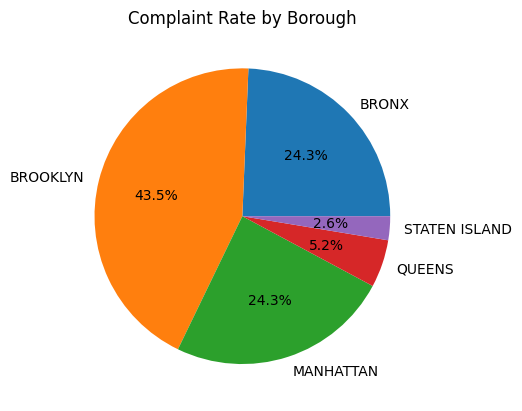

In [16]:
emrah1=crime_data.groupby(by="Borough").count()

emrah1["Crime Date"].plot(kind='pie', title='Complaint Rate by Borough', autopct='%1.1f%%', ylabel='')

In [18]:
def get_season(date):
    if pd.isna(date):
        return 'Unknown'
    year = date.year
    seasons = {'Spring': pd.date_range(start=f'{year}-03-21', end=f'{year}-06-20'),
               'Summer': pd.date_range(start=f'{year}-06-21', end=f'{year}-09-22'),
               'Fall': pd.date_range(start=f'{year}-09-23', end=f'{year}-12-20'),
               'Winter': pd.date_range(start=f'{year}-12-21', end=f'{year+1}-03-20')}
    if date in seasons['Spring']:
        return 'Spring'
    elif date in seasons['Summer']:
        return 'Summer'
    elif date in seasons['Fall']:
        return 'Fall'
    else:
        return 'Winter'

crime_data['Season'] = crime_data['Crime Date'].apply(get_season)
crime_data.head()

,Complaint ID,Crime Date,Complaint Time,Ending Date,Ending Time,Reported Date,Offense Code,Offense Description,Classification Code,Classification Description,...,Location Description,Premise Description,Park Name,Name of NYCHA Housing,X Coordinate,Y Coordinate,Latitude,Longitude,Lat_Lon,Season
0,479888864,2015-12-21,2025-02-13 09:31:00,2015-12-21,2025-02-13 09:47:00,2015-12-21,106,FELONY ASSAULT,106.0,"ASSAULT 2,1,PEACE OFFICER",...,REAR OF,RESIDENCE - PUBLIC HOUSING,NICHOLAS NAQUAN HEYWARD JR. PARK,GOWANUS,987442.0,188309.0,40.683549,-73.988492,"(40.68354911, -73.988492488)",Winter
1,817223136,2015-12-18,2025-02-13 15:30:00,2015-12-18,2025-02-13 15:35:00,2015-12-18,105,ROBBERY,386.0,"ROBBERY,PERSONAL ELECTRONIC DEVICE",...,OPPOSITE OF,PARK/PLAYGROUND,COMMODORE BARRY PARK,INGERSOLL,989927.0,192766.0,40.695781,-73.979529,"(40.695781306, -73.979528908)",Fall
2,144702604,2015-12-17,2025-02-13 22:30:00,2015-12-17,2025-02-13 22:56:00,2015-12-17,126,MISCELLANEOUS PENAL LAW,760.0,"BRIBERY,PUBLIC ADMINISTRATION",...,OPPOSITE OF,PARK/PLAYGROUND,BRONX PARK,PARKSIDE,1020965.0,255753.0,40.868589,-73.867255,"(40.86858934, -73.8672548)",Fall
3,426614014,2015-12-08,2025-02-13 20:50:00,2015-12-08,2025-02-13 20:58:00,2015-12-08,236,DANGEROUS WEAPONS,782.0,"WEAPONS, POSSESSION, ETC",...,REAR OF,PARK/PLAYGROUND,COLONEL CHARLES YOUNG TRIANGLE,HARLEM RIVER,1001650.0,240575.0,40.826989,-73.937129,"(40.826989411, -73.93712941)",Fall
4,598084040,2015-11-27,2025-02-13 11:25:00,2015-11-27,2025-02-13 11:30:00,2015-11-27,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",...,OPPOSITE OF,RESIDENCE - PUBLIC HOUSING,LINDEN PARK,LINDEN,1015829.0,179159.0,40.658379,-73.886184,"(40.658378671, -73.886184297)",Fall


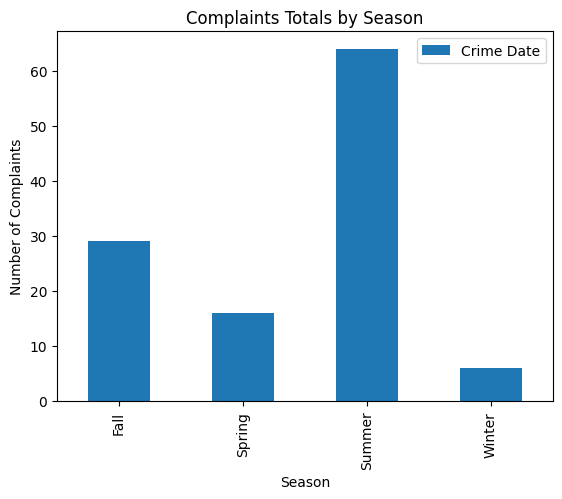

In [19]:
# Group by 'Season' and count the number of complaints
crime_by_seasons = crime_data.groupby('Season').count()

# Drop the 'Unknown' index if it exists
crime_by_seasons = crime_by_seasons.drop(index='Unknown', errors='ignore')

# Plot the data
crime_by_seasons.plot(kind='bar', y='Crime Date', title='Complaints Totals by Season')
plt.ylabel('Number of Complaints')
plt.show()

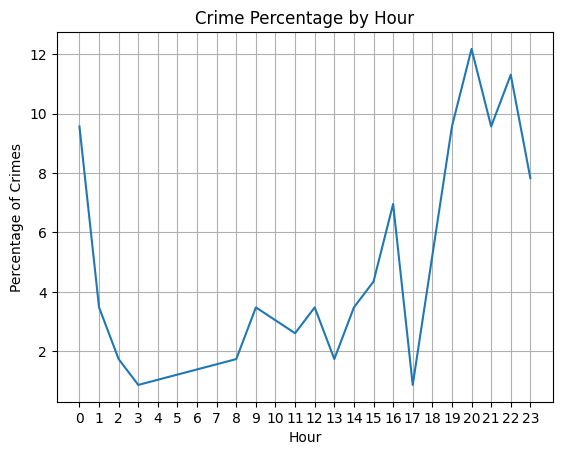

In [20]:
crime_by_hour = crime_data.groupby(crime_data['Complaint Time'].dt.hour).count()

crime_by_hour['Percentage'] = (crime_by_hour['Complaint ID'] / crime_by_hour['Complaint ID'].sum()) * 100

ax = crime_by_hour['Percentage'].plot(kind='line', title='Crime Percentage by Hour', xlabel='Hour', ylabel='Percentage of Crimes', grid=True)

ax.set_xticks(range(0, 24))

plt.show()

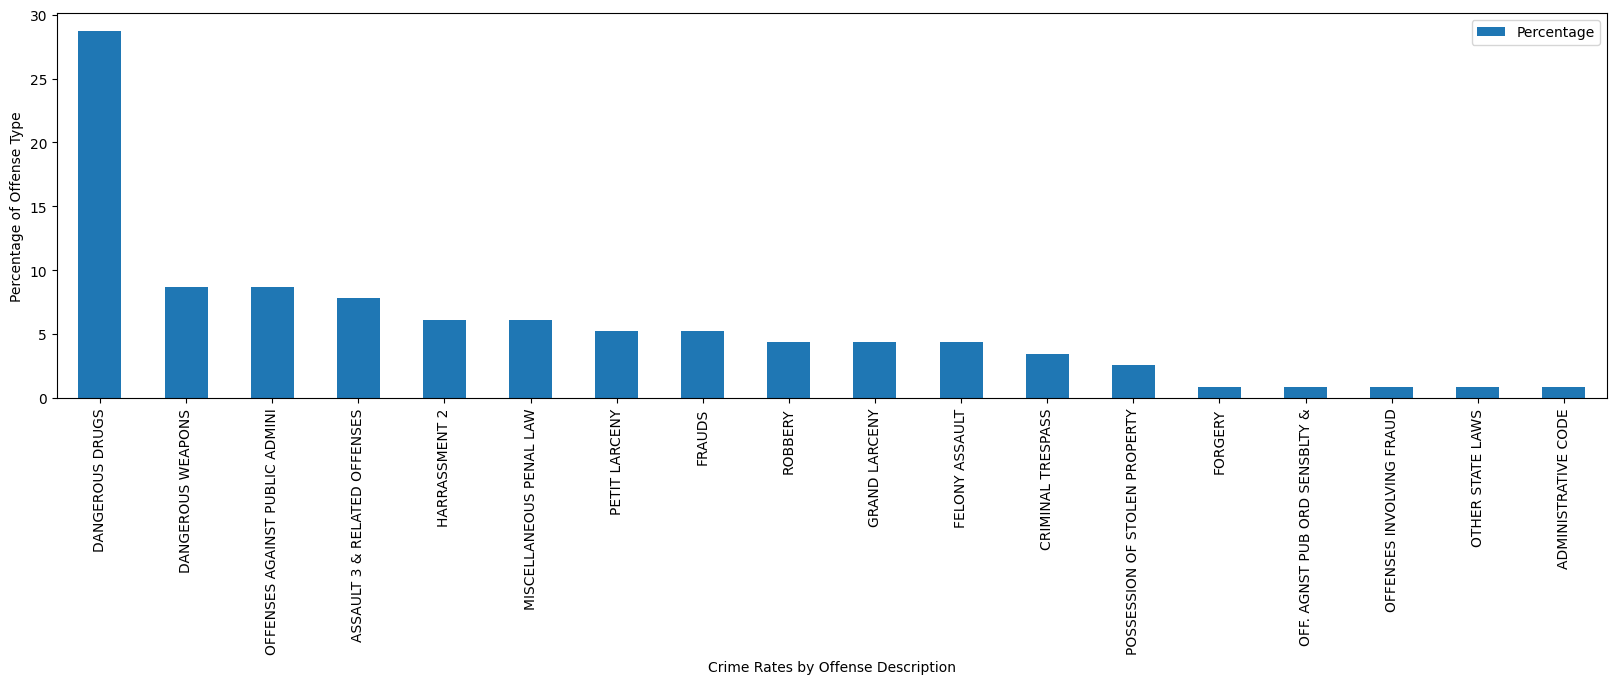

In [21]:

crime_type = crime_data.groupby(by="Offense Description").count().sort_values(by="Complaint ID", ascending=False)
crime_type['Percentage'] = (crime_type['Complaint ID'] / crime_type['Complaint ID'].sum()) * 100


crime_type.plot(kind="bar", y="Percentage", xlabel="Crime Rates by Offense Description", ylabel="Percentage of Offense Type", figsize=(20, 5))
plt.show()

/var/folders/j4/7sc4jfqx7_l9y_4px8d0cn1w0000gn/T/ipykernel_31002/2005840532.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crime_by_week = crime_data.groupby('Complaint Day').count().sort_values(by='Complaint Day')


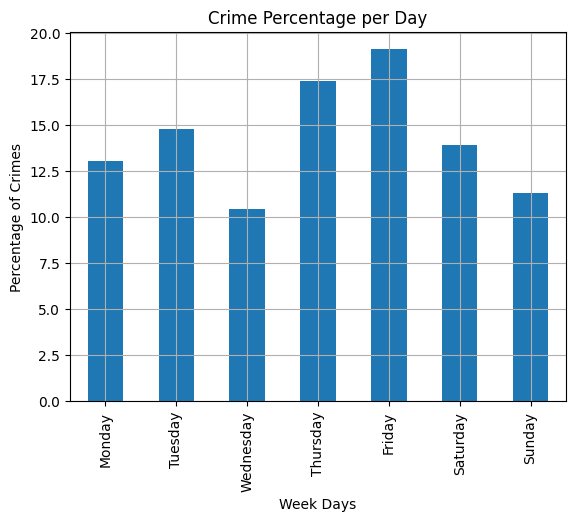

In [24]:

# Extract the day of the week from the 'Crime Date' column
crime_data['Complaint Day'] = crime_data['Crime Date'].dt.day_name()

# Define the order of days
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Convert 'Complaint Day' to a categorical type with the specified order
crime_data['Complaint Day'] = pd.Categorical(crime_data['Complaint Day'], categories=days_order, ordered=True)

# Group by 'Complaint Day' and count the number of complaints
crime_by_week = crime_data.groupby('Complaint Day').count().sort_values(by='Complaint Day')

# Calculate the percentage of complaints for each day
crime_by_week['Percentage'] = (crime_by_week['Complaint ID'] / crime_by_week['Complaint ID'].sum()) * 100

# Plot the data
ax = crime_by_week['Percentage'].plot(kind='bar', title='Crime Percentage per Day', xlabel='Week Days', ylabel='Percentage of Crimes', grid=True)
plt.show()

In [25]:
ny_plot_df = crime_data[[ "Latitude", "Longitude"]]

In [26]:
# Generate an interactive map
map_plot = ny_plot_df.hvplot.points(
    'Longitude', 'Latitude', geo=True, size='PopulationCount', scale=0.02,
    color='CityName', alpha=0.8, tiles='OSM', frame_width=700, frame_height=500
)

# Display the map
map_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]

In [27]:
ny_plot_df = crime_data[[ "Latitude", "Longitude"]]

In [28]:
# Generate an interactive map
map_plot = ny_plot_df.hvplot.points(
    'Longitude', 'Latitude', geo=True, size='PopulationCount', scale=0.02,
    color='CityName', alpha=0.8, tiles='OSM', frame_width=700, frame_height=500
)

# Display the map
map_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]

In [29]:
places_of_interest = crime_data.copy()

places_of_interest=places_of_interest.dropna()
places_of_interest.tail()

,Complaint ID,Crime Date,Complaint Time,Ending Date,Ending Time,Reported Date,Offense Code,Offense Description,Classification Code,Classification Description,...,Premise Description,Park Name,Name of NYCHA Housing,X Coordinate,Y Coordinate,Latitude,Longitude,Lat_Lon,Season,Complaint Day
110,260543857,2014-07-17,2025-02-13 18:30:00,2014-07-17,2025-02-13 18:30:00,2014-07-17,359,OFFENSES AGAINST PUBLIC ADMINI,750.0,RESISTING ARREST,...,RESIDENCE - PUBLIC HOUSING,SUMNER PLAYGROUND,SUMNER,1001477.0,193239.0,40.697065,-73.937876,"(40.697064637, -73.937875815)",Summer,Thursday
111,487186695,2014-07-13,2025-02-13 20:30:00,2014-07-13,2025-02-13 20:45:00,2014-07-14,109,GRAND LARCENY,439.0,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",...,RESIDENCE - PUBLIC HOUSING,CATHERINE SLIP MALLS,SMITH,985237.0,197940.0,40.709984,-73.996441,"(40.70998449, -73.996441344)",Summer,Sunday
112,330740886,2014-07-11,2025-02-13 01:10:00,2014-07-11,2025-02-13 01:21:00,2014-07-11,118,DANGEROUS WEAPONS,793.0,WEAPONS POSSESSION 3,...,RESIDENCE - PUBLIC HOUSING,BREUKELEN BALLFIELDS,BREUKELEN,1013655.0,177161.0,40.652902,-73.894029,"(40.652902087, -73.89402854)",Summer,Friday
113,919428487,2014-07-09,2025-02-13 21:15:00,2014-07-09,2025-02-13 21:26:00,2014-07-09,352,CRIMINAL TRESPASS,203.0,"TRESPASS 3, CRIMINAL",...,RESIDENCE - PUBLIC HOUSING,WATSON GLEASON PLAYGROUND,BRONXDALE,1020586.0,240735.0,40.827371,-73.868706,"(40.827370965, -73.868706492)",Summer,Wednesday
114,213481643,2014-07-08,2025-02-13 20:50:00,2014-07-08,2025-02-13 21:10:00,2014-07-08,236,DANGEROUS WEAPONS,782.0,"WEAPONS, POSSESSION, ETC",...,RESIDENCE - PUBLIC HOUSING,COFFEY PARK,RED HOOK WEST,982015.0,185874.0,40.676866,-74.008059,"(40.676865878, -74.008059071)",Summer,Tuesday


In [30]:
# Load NYC places of interest data
# places_of_interest = pd.read_csv(Path('crime_data.csv'))
# places_of_interest=places_of_interest[places_of_interest["Season"]=="Summer"]
# # # # Plot by place name
places_of_interest.hvplot.points(
     'Longitude', 'Latitude', geo=True, alpha=0.8,
    tiles='CartoLight', frame_width=700, frame_height=500, scale=0.02, cmap="Category20", colorbar=True, color="Offense Description"
)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Offense Description)